## ENGRI 1120 Michaelis Menten Kinetics Simulation

### Introduction

Suppose we have an enzyme $E$ that converts substrate $S$ (the starting compound) into product $P$ in a well-mixed reaction. Then, the overall reaction rate for the conversion of substrate $S$ to product $P$ is given by:

$$v = V_{max}\frac{\left[S\right]}{K_{M}+\left[S\right]}$$

where $K_{M}$ is the saturation constant for enzyme $E$ and substrate $S$, while $V_{max}$ is the maximum rate of reaction:

$$V_{max}\equiv{k_{3}}\left[E_{T}\right]$$

where $k_{3}$ is called the turn-over number of the enzyme $E$ (units: 1/time) and $\left[E_{T}\right]$ denotes the concentration of enzyme $E$.

__Limiting cases:__
* a) If $S\gg{K}_{M}$, the rate $v\simeq{V_{max}}$.
* b) If $S\ll{K}_{M}$, the rate $v$ appears to be linear with respect to substrate concentration.
* c) If $K_{M}\simeq S$, the rate $v\simeq 1/2~V_{max}$. 

### Example setup

In [1]:
import Pkg; Pkg.activate("."); Pkg.resolve(); Pkg.instantiate();

  Activating project at `~/Desktop/julia_work/ENGRI-1120-IntroToChemE-Example-Notebooks/notebooks-jupyter/ENGRI-1120-MichaelisMenten-Kinetics-Example`
  No Changes to `~/Desktop/julia_work/ENGRI-1120-IntroToChemE-Example-Notebooks/notebooks-jupyter/ENGRI-1120-MichaelisMenten-Kinetics-Example/Project.toml`
  No Changes to `~/Desktop/julia_work/ENGRI-1120-IntroToChemE-Example-Notebooks/notebooks-jupyter/ENGRI-1120-MichaelisMenten-Kinetics-Example/Manifest.toml`


In [13]:
# load required Julia packages
using Plots
using Colors

# paths -
const _ROOT = pwd();
const _PATH_TO_FIGS = joinpath(_ROOT, "figs");

### Load the example code library
The call to the `include` function loads the `ENGRI-1120-MM-Example-CodeLib.jl` library into the notebook; the library contains types and functions we use during the lab:

In [3]:
include("ENGRI-1120-MM-Example-CodeLib.jl");

### Set model parameters

In [4]:
# set some example model parameters -
k = 13.7; # units: 1/s 
Kₘ = 130.0; # units: μmol/L
Eₜ = 12.0; # units: μmol/L

#### Simulate the three limiting regimes 

In [16]:
# setup subtrate range -
X = range(0.0, stop=6.0, step=0.01) |> collect;

In [17]:
# setup the simulation -
Nₛ = length(X);
V_array = Array{Float64,2}(undef, Nₛ, 4);

# compute the Vₘ -
Vₘ = k*Eₜ;

# main loop -
for i = 1:Nₛ
    
    # grab the S -
    S = X[i]*Kₘ

    # compute the rate -
    V_array[i,1] = S;
    V_array[i,2] = Vₘ*(S)/(Kₘ + S);
    V_array[i,3] = Vₘ;
    V_array[i,4] = (Vₘ/Kₘ)*(S);
end

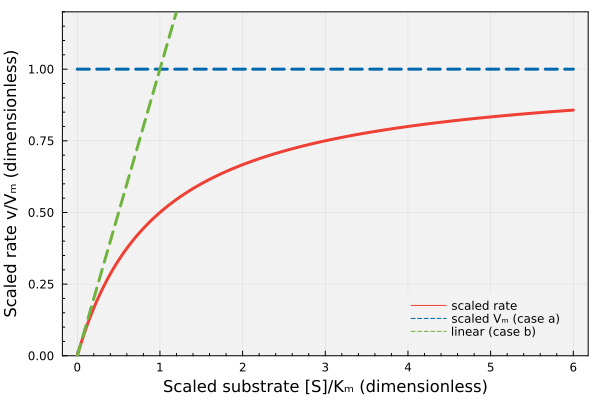

In [18]:
# visualize scaled -
plot((1/Kₘ)*V_array[:,1], (1/Vₘ)*V_array[:,2], lw=3, ylim=(0.0,1.2), minorticks=10.0, legend=:bottomright, 
    c=colorant"#EF4035", bg=colorant"#F2F2F2", background_color_outside="white", framestyle = :box, fg_legend = :transparent, label="scaled rate")
plot!((1/Kₘ)*V_array[:,1], (1/Vₘ)*V_array[:,3], lw=3, ls=:dash, c=colorant"#0068AC", label="scaled Vₘ (case a)")
plot!((1/Kₘ)*V_array[:,1], (1/Vₘ)*V_array[:,4], lw=3, ls=:dash, c=colorant"#6EB43F", label="linear (case b)")

# setup labels -
xlabel!("Scaled substrate [S]/Kₘ (dimensionless)", fontsize=18)
ylabel!("Scaled rate v/Vₘ (dimensionless)", fontsize=18)

# save fig -
# filename = "Fig-MM-Kinetic-Regimes.pdf";
# savefig(joinpath(_PATH_TO_FIGS, filename));